In [2]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d robikscube/hourly-energy-consumption
!unzip /content/hourly-energy-consumption.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 44% 5.00M/11.4M [00:00<00:00, 35.1MB/s]
100% 11.4M/11.4M [00:00<00:00, 55.0MB/s]
Archive:  /content/hourly-energy-consumption.zip
  inflating: AEP_hourly.csv          
  inflating: COMED_hourly.csv        
  inflating: DAYTON_hourly.csv       
  inflating: DEOK_hourly.csv         
  inflating: DOM_hourly.csv          
  inflating: DUQ_hourly.csv          
  inflating: EKPC_hourly.csv         
  inflating: FE_hourly.csv           
  inflating: NI_hourly.csv           
  inflating: PJME_hourly.csv         
  inflating: PJMW_hourly.csv         
  inflating: PJM_Load_hourly.csv     
  inflating: est_hourly.paruqet      
  inflating: pjm_hourly_est.csv      


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import sklearn

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



#Reformat the Date Time Columns


In [8]:
# Extract all Data Like Year Month Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.hour
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,1,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,2,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,3,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,4,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,5,53,Friday


In [9]:
# How many Unique Year do we Have in Dataset
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



#Energy consumption in Each Year


Text(0.5, 1.0, 'Energy Consumption According to Year')

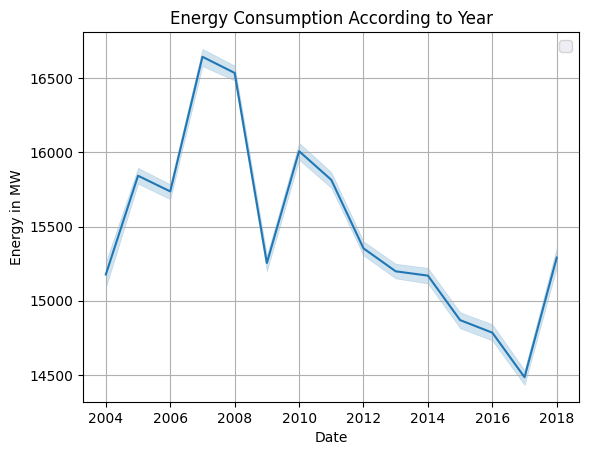

In [10]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()


plt.title("Energy Consumption According to Year")

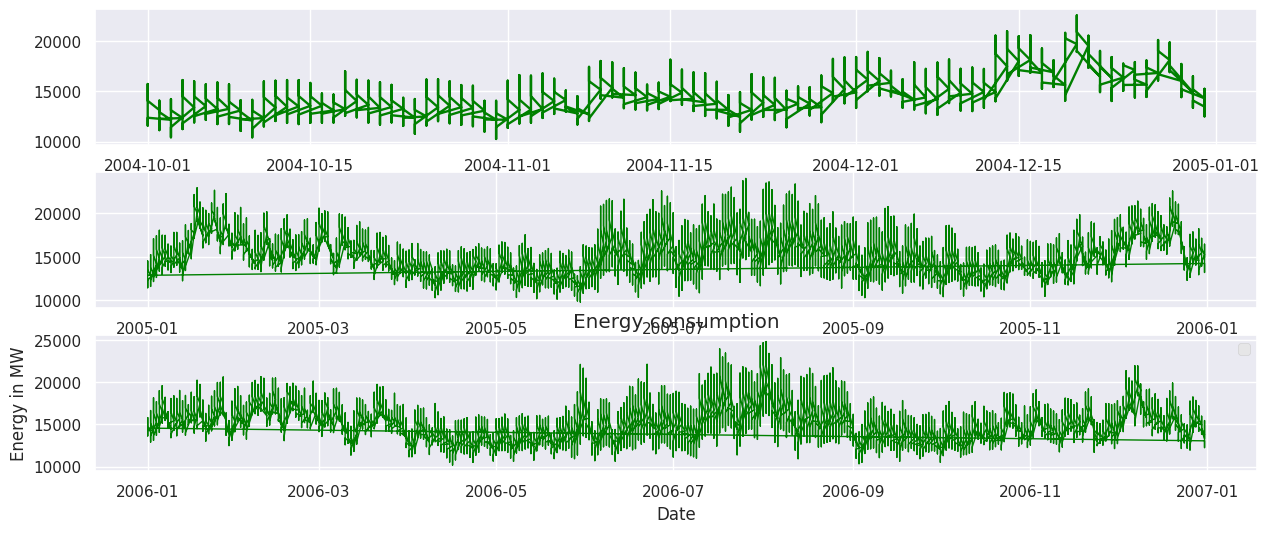

In [11]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset["2004"]["AEP_MW"].to_list()
x_2004 = dataset["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset["2005"]["AEP_MW"].to_list()
x_2005 = dataset["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset["2006"]["AEP_MW"].to_list()
x_2006 = dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()


Energy Distribution

Text(0.5, 1.0, 'Energy Distribution')

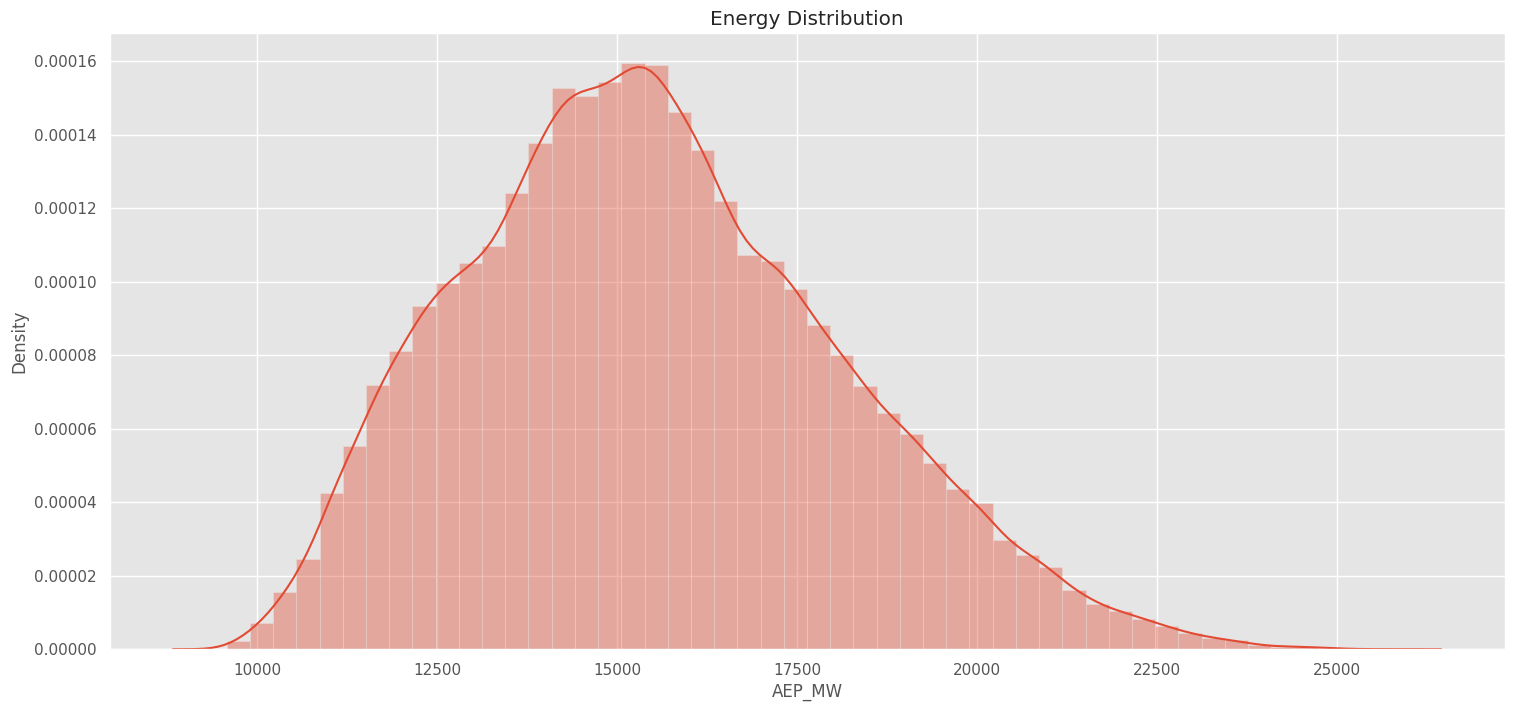

In [ ]:
sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

#Energy with Respect to Day

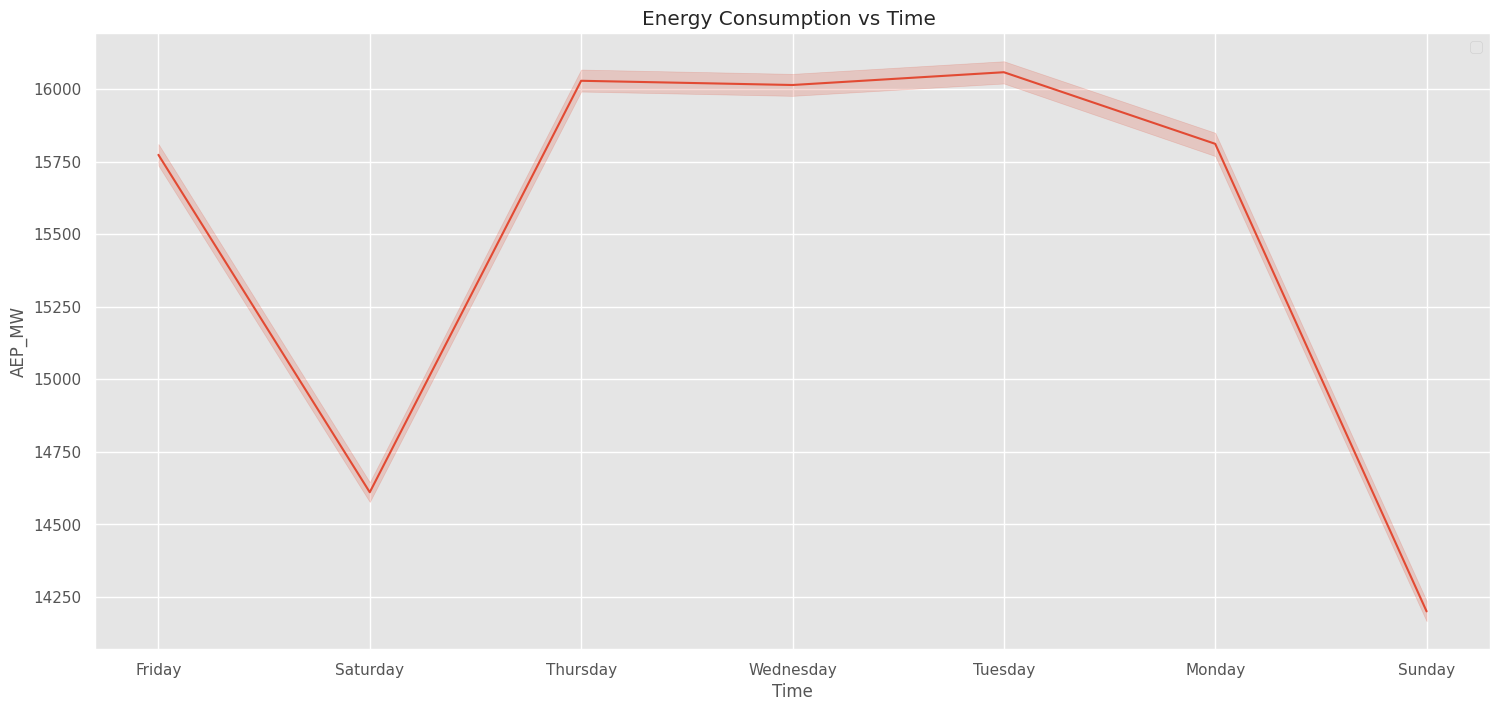

In [ ]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Day"], y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()


#Energy with Respect to Hour

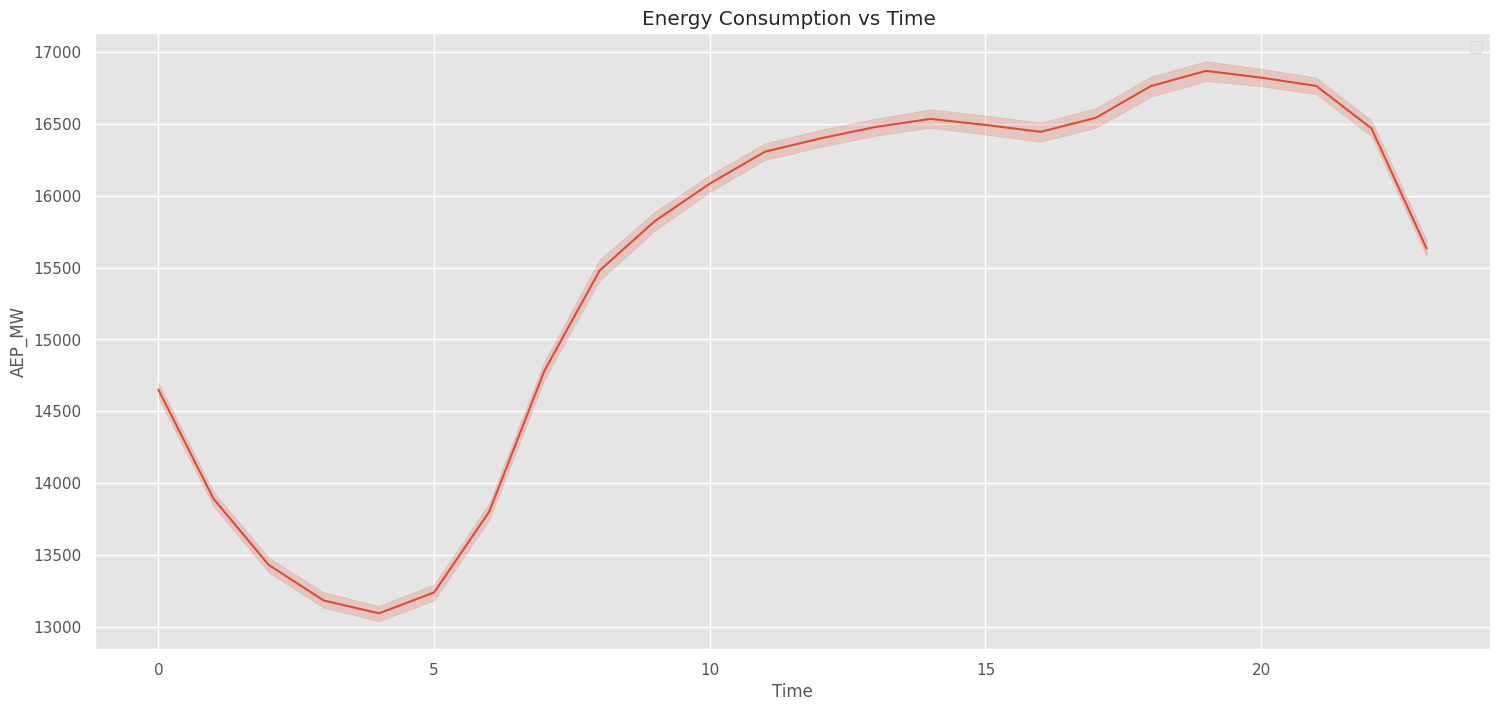

In [12]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"], y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()


Resampleing Data


In [13]:
NewDataSet = dataset.resample('D').mean()

In [14]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 5)


In [15]:
TestData = NewDataSet.tail(1000)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-1000]

In [16]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4055, 1)
Test Set Shape  (1000, 5)


In [17]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [22]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):
    # X_Train 0-59
    X_Train.append(Train[i-60:i])
    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(3995, 60, 1)
(3995, 1)


In [26]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(3995, 60, 1)

# Model Build

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential

In [28]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [30]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [31]:
regressor.fit(X_Train,
              Y_Train,
              epochs = 50,
              batch_size = 32)

Epoch 1/50
125/125 [==============================] - 49s 306ms/step - loss: 0.0245 - accuracy: 2.5031e-04
Epoch 2/50
125/125 [==============================] - 41s 331ms/step - loss: 0.0194 - accuracy: 2.5031e-04
Epoch 3/50
125/125 [==============================] - 39s 309ms/step - loss: 0.0184 - accuracy: 2.5031e-04
Epoch 4/50
125/125 [==============================] - 40s 320ms/step - loss: 0.0177 - accuracy: 2.5031e-04
Epoch 5/50
125/125 [==============================] - 37s 294ms/step - loss: 0.0173 - accuracy: 5.0063e-04
Epoch 6/50
125/125 [==============================] - 36s 287ms/step - loss: 0.0171 - accuracy: 5.0063e-04
Epoch 7/50
125/125 [==============================] - 36s 293ms/step - loss: 0.0164 - accuracy: 5.0063e-04
Epoch 8/50
125/125 [==============================] - 41s 326ms/step - loss: 0.0163 - accuracy: 5.0063e-04
Epoch 9/50
125/125 [==============================] - 40s 320ms/step - loss: 0.0162 - accuracy: 2.5031e-04
Epoch 10/50
125/125 [================

In [32]:
TestData.head()

,AEP_MW,Month,Year,Time,Week
Datetime,,,,,
2015-11-08,12431.625000,11.0,2015.0,11.5,45.0
2015-11-09,14396.125000,11.0,2015.0,11.5,46.0
2015-11-10,13794.458333,11.0,2015.0,11.5,46.0
2015-11-11,13665.208333,11.0,2015.0,11.5,46.0
2015-11-12,13683.375000,11.0,2015.0,11.5,46.0


In [37]:
TestData.tail()

,AEP_MW,Month,Year,Time,Week
Datetime,,,,,
2018-07-30,15368.083333,7.0,2018.0,11.5,31.0
2018-07-31,15180.291667,7.0,2018.0,11.5,31.0
2018-08-01,15151.166667,8.0,2018.0,11.5,31.0
2018-08-02,15687.666667,8.0,2018.0,11.5,31.0
2018-08-03,14809.000000,8.0,2018.0,0.0,31.0


In [33]:
TestData.shape

(1000, 5)

In [34]:
NewDataSet.shape

(5055, 5)

In [35]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)
Df_Total.shape

(6055, 1)

In [36]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(1060, 1)

In [38]:
# Reshape the Dataset
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 1060):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

32/32 [==============================] - 7s 150ms/step


Future Predicted


In [39]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2015-11-08,12431.625000,13809.691406
1,2015-11-09,14396.125000,12879.708984
2,2015-11-10,13794.458333,15651.485352
3,2015-11-11,13665.208333,14116.032227
4,2015-11-12,13683.375000,14145.810547
...,...,...,...
995,2018-07-30,15368.083333,14671.822266
996,2018-07-31,15180.291667,15604.892578
997,2018-08-01,15151.166667,15071.178711
998,2018-08-02,15687.666667,15180.702148


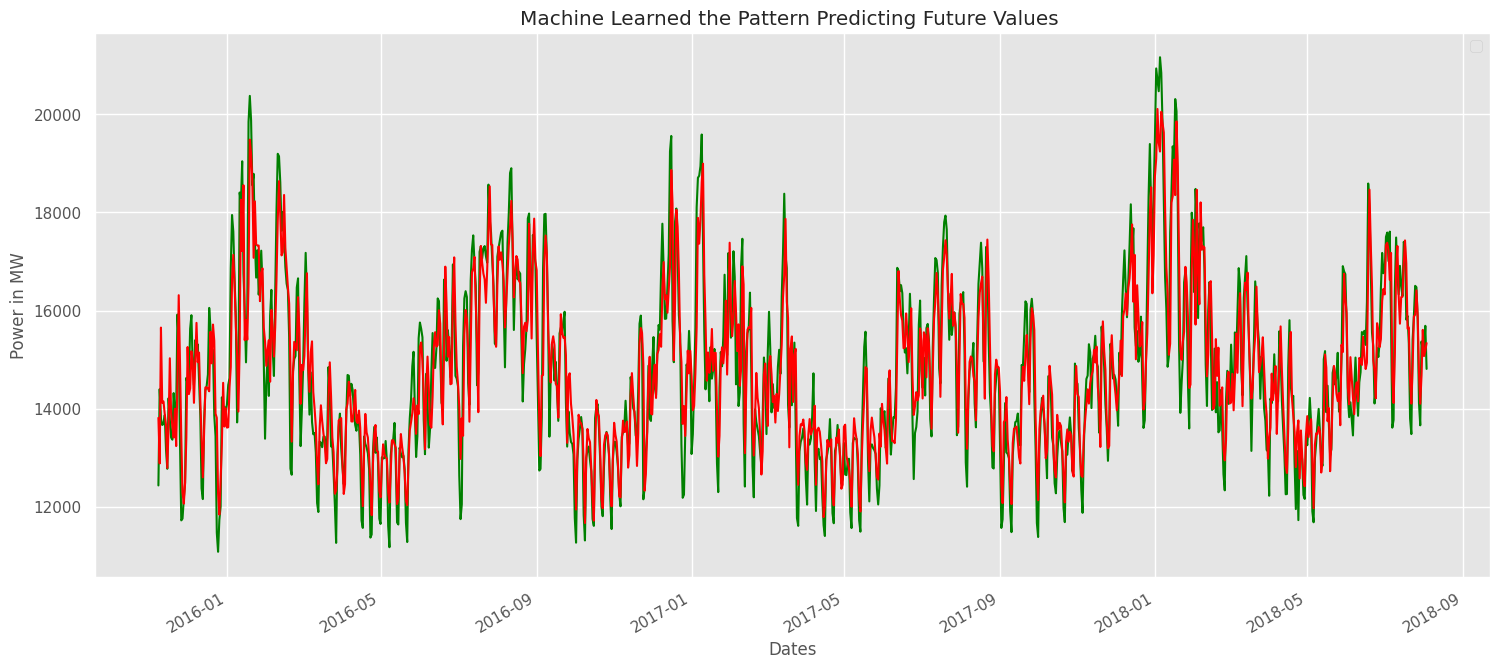

In [40]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

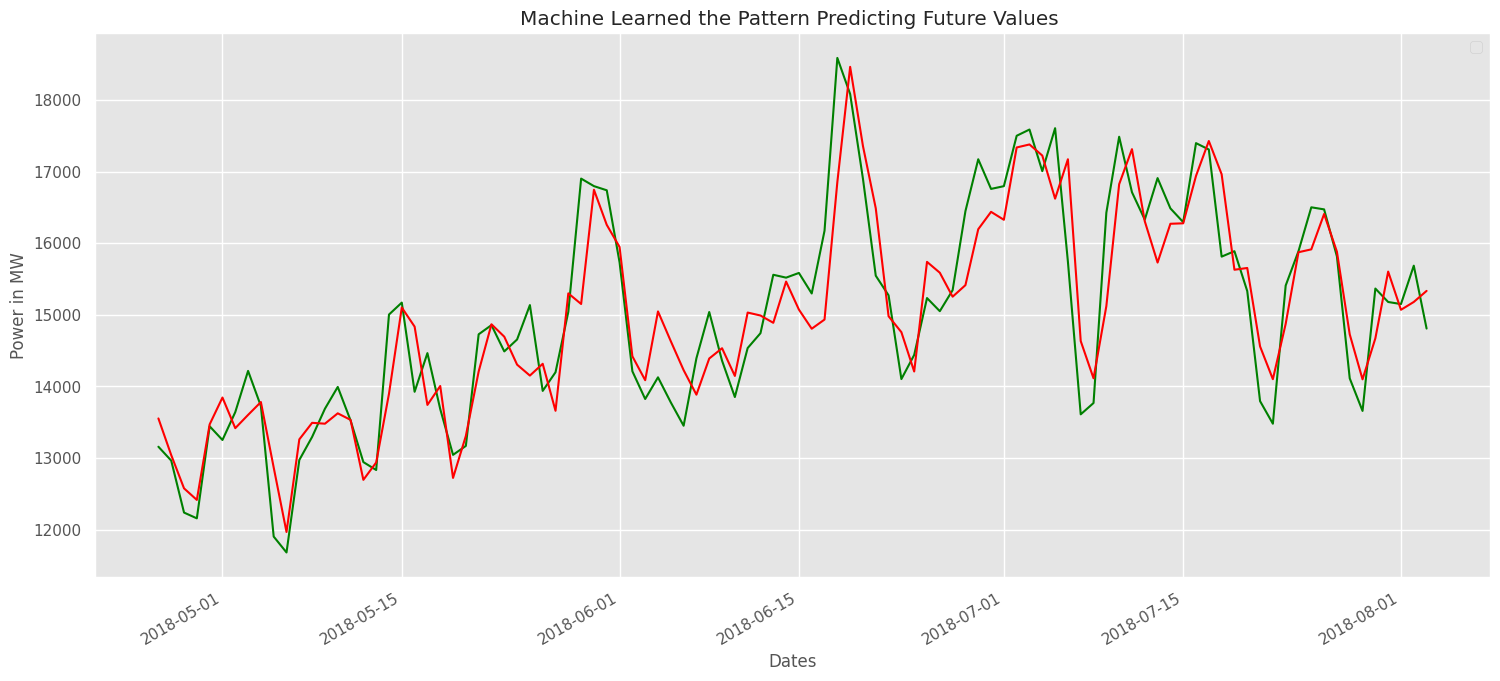

In [43]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates[900:1000]
y = True_MegaWatt[900:1000]

y1 = Predicted_MegaWatt[900:1000]

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()